Following the notebook s5_dataset_regularization_template.ipynb:

Use L2 regularization and dropout to reduce the variance (overfitting) in the classifier. The final aim is to reduce the gap between the training and the testing accuracy.

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_decision_regions

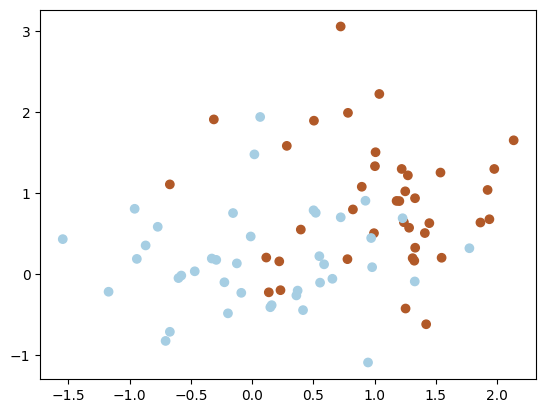

In [11]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [12]:
from tensorflow.keras import layers, regularizers
import tensorflow as tf

my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2,), name="input"),
    layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid", name="output")
])

In [13]:
my_first_neural_net.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
                                  loss= tf.keras.losses.binary_crossentropy, 
                                  metrics=['accuracy'])

In [15]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Epoch 1/5000


3/3 - 1s - 221ms/step - accuracy: 0.4625 - loss: 1.0445
Epoch 2/5000
3/3 - 0s - 16ms/step - accuracy: 0.4500 - loss: 0.9090
Epoch 3/5000
3/3 - 0s - 14ms/step - accuracy: 0.4125 - loss: 0.8474
Epoch 4/5000
3/3 - 0s - 13ms/step - accuracy: 0.5625 - loss: 0.8040
Epoch 5/5000
3/3 - 0s - 13ms/step - accuracy: 0.5875 - loss: 0.7921
Epoch 6/5000
3/3 - 0s - 12ms/step - accuracy: 0.6000 - loss: 0.7869
Epoch 7/5000
3/3 - 0s - 13ms/step - accuracy: 0.6875 - loss: 0.7496
Epoch 8/5000
3/3 - 0s - 13ms/step - accuracy: 0.5125 - loss: 0.8002
Epoch 9/5000
3/3 - 0s - 13ms/step - accuracy: 0.7000 - loss: 0.7335
Epoch 10/5000
3/3 - 0s - 12ms/step - accuracy: 0.6000 - loss: 0.7572
Epoch 11/5000
3/3 - 0s - 13ms/step - accuracy: 0.6500 - loss: 0.7451
Epoch 12/5000
3/3 - 0s - 13ms/step - accuracy: 0.7500 - loss: 0.6897
Epoch 13/5000
3/3 - 0s - 14ms/step - accuracy: 0.6250 - loss: 0.7347
Epoch 14/5000
3/3 - 0s - 14ms/step - accuracy: 0.6625 - loss: 0.7234
Epoch 15/5000
3/3 - 0s - 14ms/step - accuracy: 0.7125 -

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 509us/step


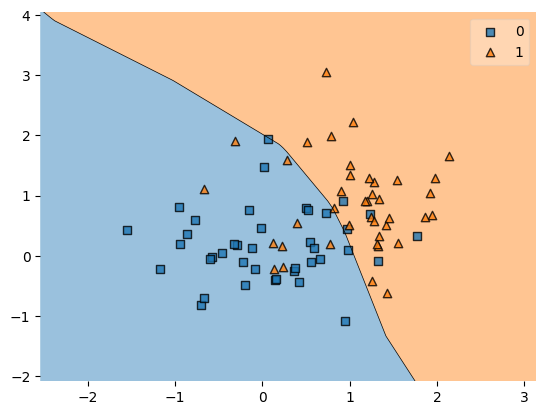

In [16]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [17]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8461 - loss: 0.4216  


[0.4331219792366028, 0.824999988079071]

In [18]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7766 - loss: 0.4708 


[0.4615446925163269, 0.7875000238418579]